# On Pyrex

## Making the fit

To make the eccentricity fit, Pyrex uses the following equation to compute the eccentricity contribution to both the phase and amplitude
$$e_X = \frac{X_{\text{NR}}(X_c)-X_c}{2X_c},$$
with $X$ being both $\omega$, the instantaneous frequency and $\mathcal{A}$, the amplitude. $X_c$ means that these quantities were taken from a circular simulation and $X_\text{NR}$ means that they were taken from an eccentric simulation.

The resulting $e_X$ equations are then fit according to the following relation
$$e_X = Ae^{BX^\kappa_c}\sin(fX^\kappa_c + \varphi),$$
with $A, B, f$ and $\varphi$ standard damped sinusoidal parameters. It turns out that $A$ and $B$ are highly correlated with the eccentricity, $f^2$ with the mass ratio, and $\varphi$ an extra degree of freedom of which the behaviour is not well understood. $\kappa$ takes different values for the instantaneouos frequency and amplitude, namely $\kappa = -59/24$ for the frequency and $\kappa=-83/24$ for the amplitude for a circular BBH with a total mass $M=50M_\odot$.

### How it works

In practice, $X_c$ are the components of a simulation with the same mass ratio and zero eccentricity. In other words, for every mass ratio in the used eccentric simulations there needs to be a circular simulation with the same mass ratio. $X_\text{NR}$ are then the components of an eccentric binary simulation. However, this method only works if the only major differences in these simulations is the eccentricity and mass ratio. Furthermore, since Pyrex does not compute the mass ratio and eccentricity, these values have been taken from the literature at a reference frequency of $x=0.075$. The mean anomaly is *not* used. Since then, many of these simulations have been superseded, meaning that some of these parameters from the literature might be obsolete, but more significantly, there are better simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pyrex.core import main
from pyrex.main import glassware
from qcextender.waveform import Waveform
from qcextender import units

/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain

In [28]:
sims = ["SXS:BBH:0180v2.0", "SXS:BBH:1355", "SXS:BBH:1357", "SXS:BBH:1362", "SXS:BBH:1363v2.0", "SXS:BBH:0184v2.0", "SXS:BBH:1364", "SXS:BBH:1368", "SXS:BBH:1369", "SXS:BBH:0183v2.0", "SXS:BBH:1373", "SXS:BBH:1374"]
q = [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0]

training = glassware(q=q, names=sims, outfname="/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/data/pyrexdata.pkl")

## Zero eccentricity case

An obvious test case is the limit where $e = 0$. This can be compared against any model, but should be checked along a range in masses and mass ratios. Here I used IMRPhenomD because of the shorter wall-clock time. The expectation in the $e=0$ case is that the mismatches are very low, but non-zero, across both the mass ratio and total mass ranges. This should not be zero since the power law is still used and it is unlikely the amplitude parameter $A$ will go to $0$. Furthermore, some numerical deviation is to be expected when integrating $\omega$ to obtain the phase.

### Single waveform visual check

Listed here are two visual comparisons of the strain, accumulated phase, and amplitude. These offer only a small insight and are only listed to show the validity of the following mismatch calculations.

/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


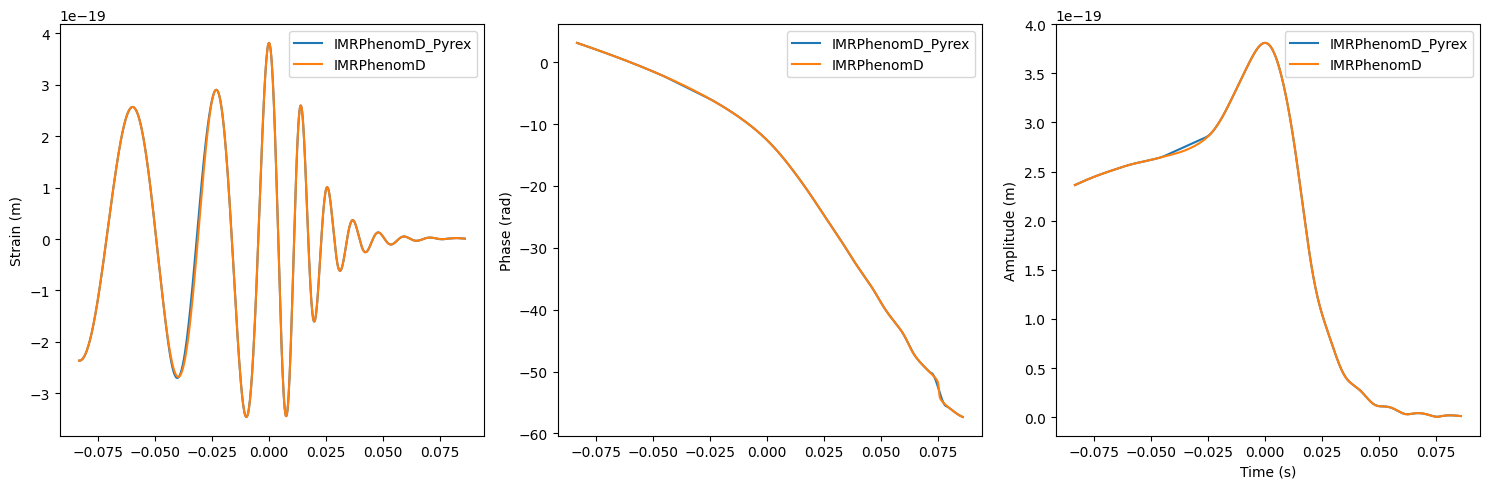

In [3]:
kwargs = {
    "mass1": 100,
    "mass2": 100,
    "inclination": 0,
    "coa_phase": 0,
    "delta_t": 1.0 / 4196,
    "f_lower": 20,
    "f_ref": 25,
    "distance": 10,
}

phen = Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)
kwargs.update({"eccentricity": 0,})
phen_ecc = main("IMRPhenomD", [(2, 2)], False, **kwargs)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(phen_ecc.time, phen_ecc[2, 2], label="IMRPhenomD_Pyrex")
axes[0].plot(phen.time, phen[2, 2], label="IMRPhenomD")
axes[0].set_ylabel("Strain (m)")
axes[0].legend()

axes[1].plot(phen_ecc.time, phen_ecc.phase(), label="IMRPhenomD_Pyrex")
axes[1].plot(phen.time, phen.phase(), label="IMRPhenomD")
axes[1].set_ylabel("Phase (rad)")
axes[1].legend()

axes[2].plot(phen_ecc.time, phen_ecc.amp(), label="IMRPhenomD_Pyrex")
axes[2].plot(phen.time, phen.amp(), label="IMRPhenomD")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()

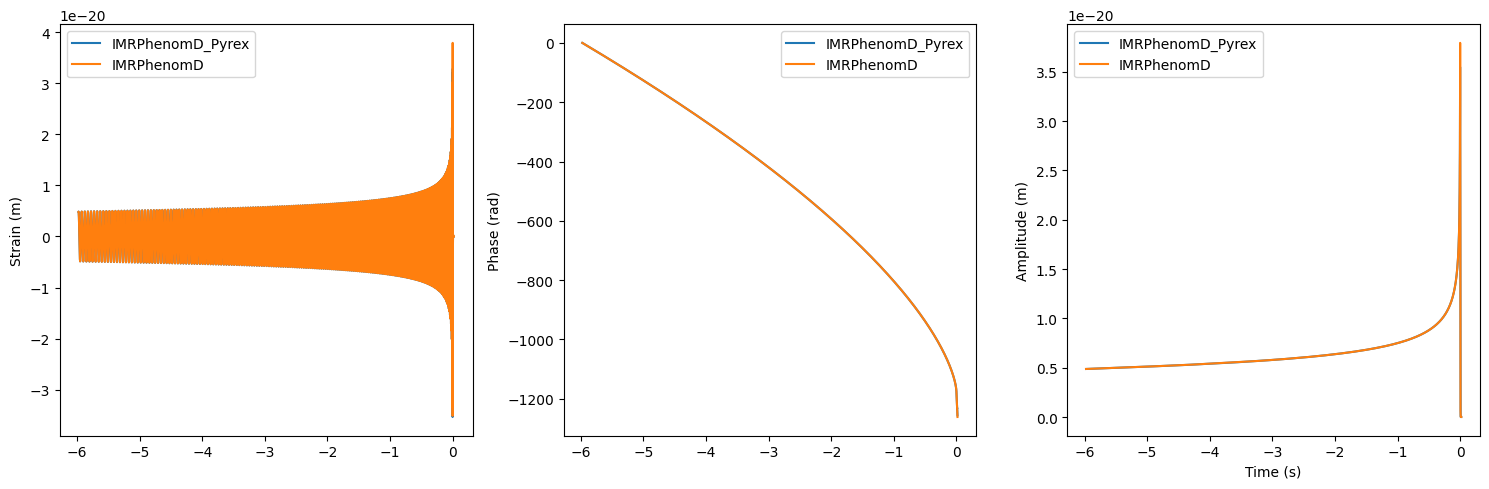

In [4]:
kwargs = {
    "mass1": 10,
    "mass2": 10,
    "inclination": 0,
    "coa_phase": 0,
    "delta_t": 1.0 / 4196,
    "f_lower": 20,
    "f_ref": 25,
    "distance": 10,
}

phen = Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)
kwargs.update({"eccentricity": 0,})
phen_ecc = main("IMRPhenomD", [(2, 2)],  False, **kwargs)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(phen_ecc.time, phen_ecc[2, 2], label="IMRPhenomD_Pyrex")
axes[0].plot(phen.time, phen[2, 2], label="IMRPhenomD")
axes[0].set_ylabel("Strain (m)")
axes[0].legend()

axes[1].plot(phen_ecc.time, phen_ecc.phase(), label="IMRPhenomD_Pyrex")
axes[1].plot(phen.time, phen.phase(), label="IMRPhenomD")
axes[1].set_ylabel("Phase (rad)")
axes[1].legend()

axes[2].plot(phen_ecc.time, phen_ecc.amp(), label="IMRPhenomD_Pyrex")
axes[2].plot(phen.time, phen.amp(), label="IMRPhenomD")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()


### Mismatch heatmap

Shown here is the Mismatch between the IMRPhenomD model and the waveform returned by Pyrex when setting $e=0$. They are all within an order of magnitude of each other, showing that the only difference is likely the Savitzky-Golay filtering and numerical deviation from the numeric integration. The increase towards higher $M_\odot$ can be explained by the Savitzky-Golay filter filtering a relatively larger part of the inspiral. The low $M_\odot$ increase does not have an obvious reason to me at the moment.

In [5]:
spin1=(0,0,0)
spin2=(0,0,0)
distance, inclination, coa_phase = 10, 0, 0
f_lower=20
G = 6.67e-11
m = 1.9e30
c = 299792458

mass_ratio = np.linspace(1, 3, 50)
total_masses = np.linspace(20, 180, 50)

mm_no_ecc_phend  = np.zeros((len(mass_ratio), len(total_masses)))

for i, q in enumerate(mass_ratio):
    for j, M in enumerate(total_masses):
        mass1 = q * M / (q + 1)
        mass2 = M / (q + 1)
        kwargs = {'mass1': mass1, 'mass2': mass2, 'eccentricity': 0,
                  'spin1': spin1, 'spin2': spin2,
                  'inclination': inclination, 'distance': distance,
                  'coa_phase': coa_phase, "delta_t": 1.0 / 4096,
                  "f_ref": 20, "f_lower": f_lower}

        phen_ecc = main("IMRPhenomD", [(2, 2)], False, **kwargs)
        phen_circ = Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)

        f_max = c**3/(6**(3/2)*np.pi*G*M*m)
        mm_no_ecc_phend[i, j] = 1 - phen_ecc.match(phen_circ, f_lower)

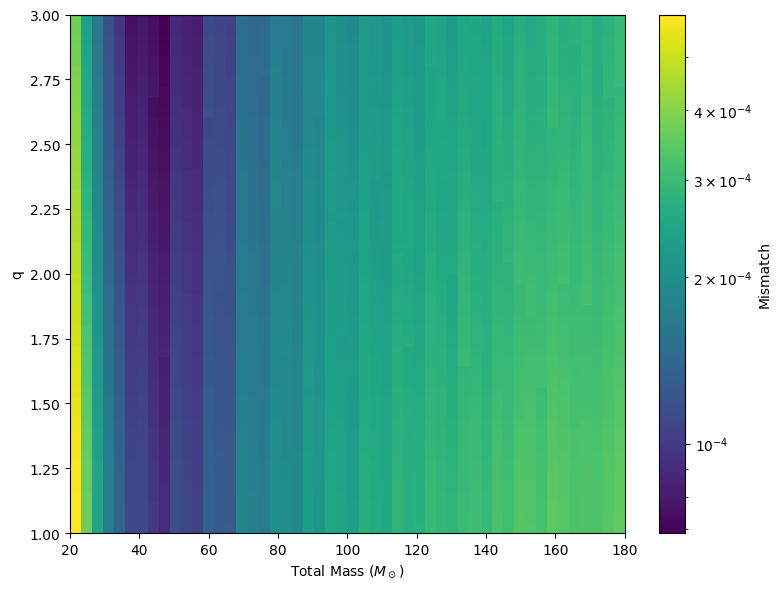

In [6]:
plt.figure(figsize=(8, 6))
plt.imshow(mm_no_ecc_phend, origin='lower', aspect='auto',
           extent=[total_masses.min(), total_masses.max(),
                   mass_ratio.min(), mass_ratio.max()],
           cmap='viridis',
           norm=colors.LogNorm(vmin=np.nanmin(mm_no_ecc_phend[mm_no_ecc_phend > 0]),  # avoid log(0)
                               vmax=np.nanmax(mm_no_ecc_phend)))
plt.colorbar(label="Mismatch")
plt.xlabel(r"Total Mass $(M_\odot)$")
plt.ylabel("q")
# plt.title("Mismatch Heatmap: IMRPhenomD Eccentric vs Circular")
plt.tight_layout()
plt.show()

## Inspecting individual waveforms

The eccentricity caused modulations to the amplitude and frequency are stored in a file with a datapoint at the points in parameter space covered by the simulations. For every waveform generated by Pyrex these points are taken and then interpolated according to the correlations mentioned above. In practice, the $50M_\odot$ calibration also means that the time when the modulations are added into the inspiral is $-1500M$, since they are extracted from NR at $-1500M$. In order to properly compare these waveforms, they are compared to other models. I will use EccentricTD and TaylorT4 as comparison models; they make for a good comparison duo because the latter formed the basis for the former which added eccentricity calculations.

/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


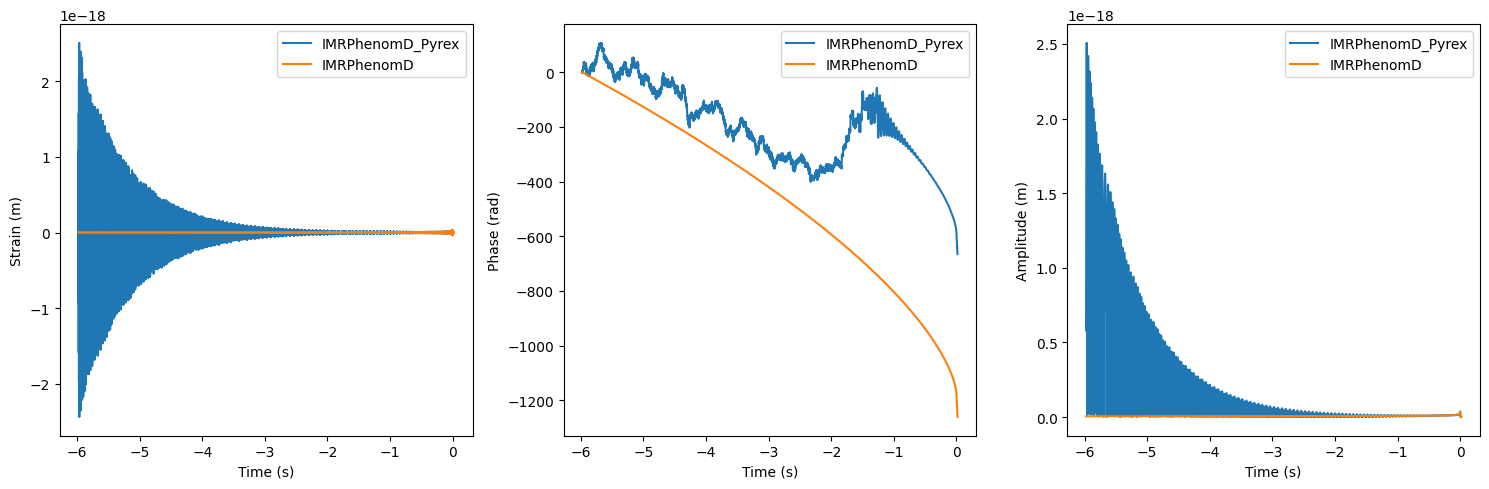

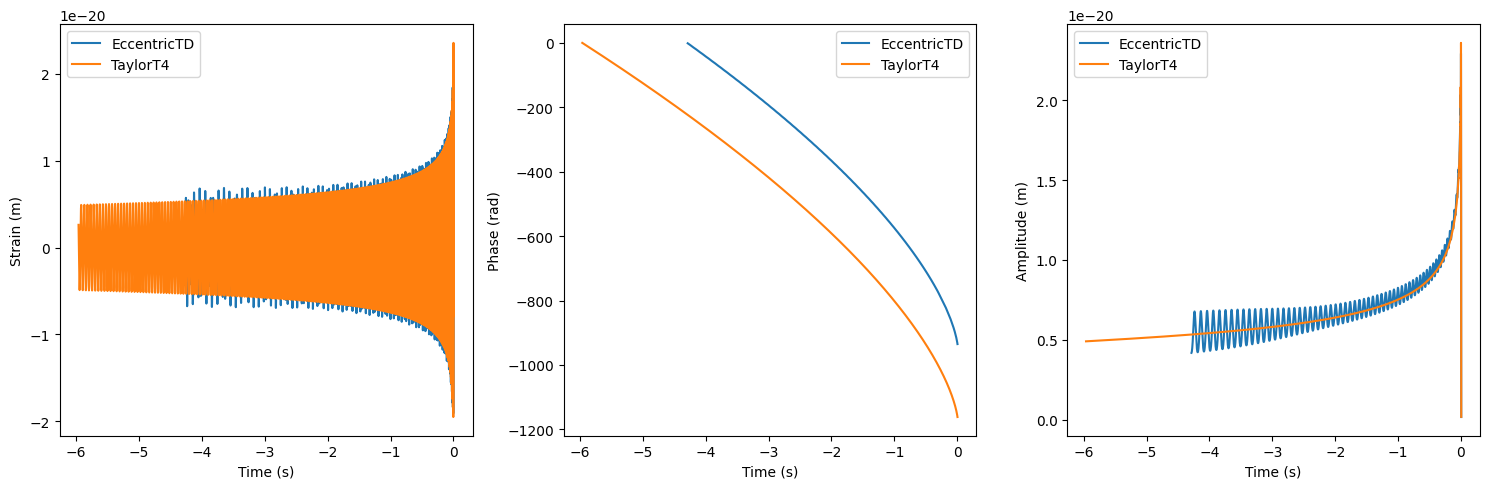

In [7]:
kwargs = {
    "mass1": 10,
    "mass2": 10,
    "inclination": 0,
    "coa_phase": 0,
    "delta_t": 1.0 / 4196,
    "f_lower": 20,
    "f_ref": 25,
    "distance": 10,
}

phen = Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)
kwargs.update({"amplitude0": 0, "phase0": 4})
taylor_t4 = Waveform.from_model("TaylorT4", [(2, 2)], **kwargs)
kwargs.update({"eccentricity": 0.1})
phen_ecc = main("IMRPhenomD", [(2, 2)], False, **kwargs)
eccentric_td = Waveform.from_model("EccentricTD", [(2, 2)], **kwargs)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(phen_ecc.time, phen_ecc[2, 2], label="IMRPhenomD_Pyrex")
axes[0].plot(phen.time, phen[2, 2], label="IMRPhenomD")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(phen_ecc.time, phen_ecc.phase(), label="IMRPhenomD_Pyrex")
axes[1].plot(phen.time, phen.phase(), label="IMRPhenomD")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(phen_ecc.time, phen_ecc.amp(), label="IMRPhenomD_Pyrex")
axes[2].plot(phen.time, phen.amp(), label="IMRPhenomD")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(eccentric_td.time, eccentric_td[2, 2], label="EccentricTD")
axes[0].plot(taylor_t4.time, taylor_t4[2, 2], label="TaylorT4")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(eccentric_td.time, eccentric_td.phase(), label="EccentricTD")
axes[1].plot(taylor_t4.time, taylor_t4.phase(), label="TaylorT4")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(eccentric_td.time, eccentric_td.amp(), label="EccentricTD")
axes[2].plot(taylor_t4.time, taylor_t4.amp(), label="TaylorT4")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()

### Cut at $-1500M$

As shown above, propagating the fit backwards in time causes large numerical errors and should be avoided. The way to compare these fairly would be to cut all waveforms at $-1500M$, the point in time where the parameters are fit from NR. This is, however, detrimental for its usability in any PE pipelines; it will be evaluated as a proof of concept.

In [8]:
def cut(wave):
    strain = []
    strain.append(wave[2,2][np.where(wave.time > units.tM_to_tSI(-1500, wave.metadata.total_mass))])
    time = wave.time[np.where(wave.time > units.tM_to_tSI(-1500, wave.metadata.total_mass))]
    return Waveform(strain, time, wave.metadata)

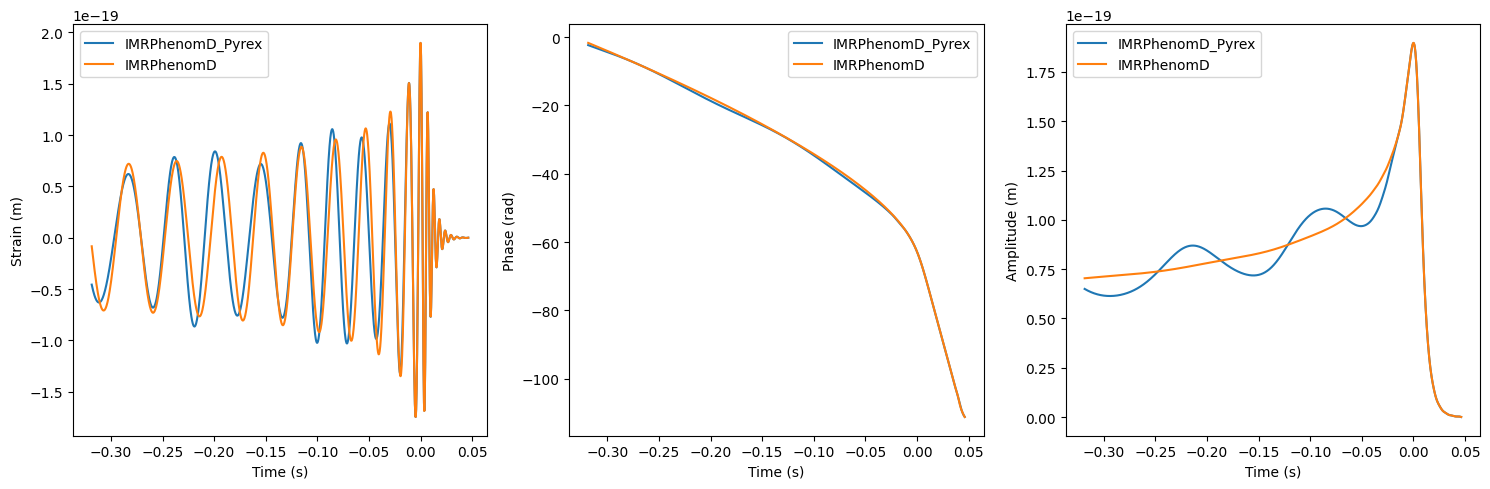

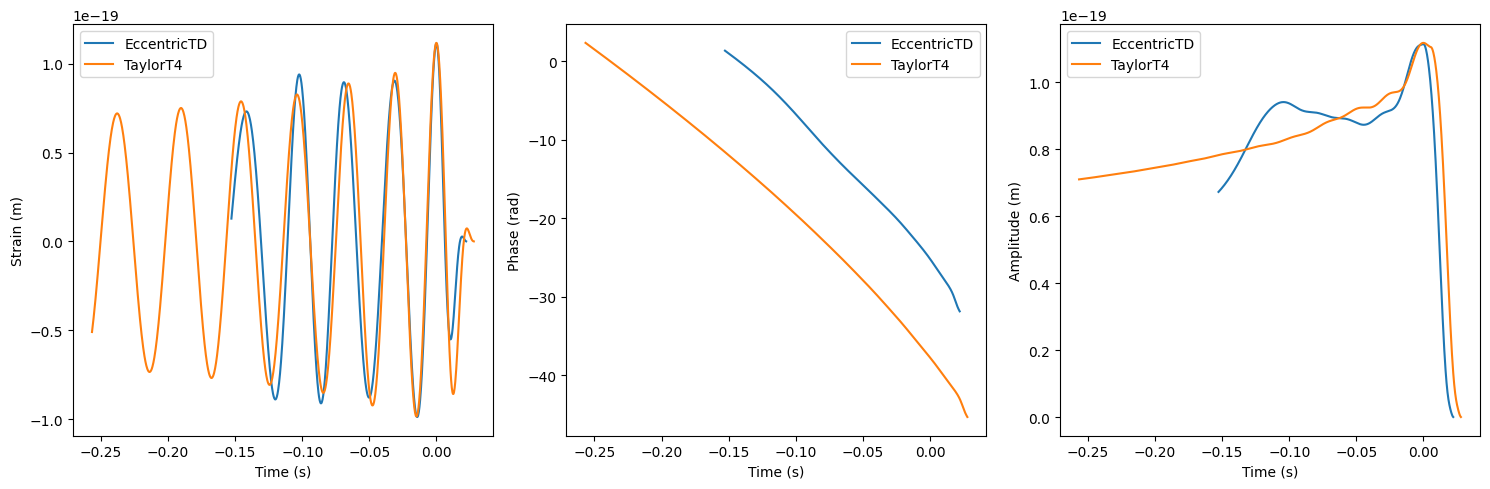

In [9]:
kwargs = {
    "mass1": 50,
    "mass2": 50,
    "inclination": 0,
    "coa_phase": 0,
    "delta_t": 1.0 / 4196,
    "f_lower": 20,
    "f_ref": 25,
    "distance": 10,
}

phen = cut(Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs))
kwargs.update({"amplitude0": 0, "phase0": 4})
taylor_t4 = cut(Waveform.from_model("TaylorT4", [(2, 2)], **kwargs))
kwargs.update({"eccentricity": 0.1})
phen_ecc = cut(main("IMRPhenomD", [(2, 2)], **kwargs))
eccentric_td = cut(Waveform.from_model("EccentricTD", [(2, 2)], **kwargs))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(phen_ecc.time, phen_ecc[2, 2], label="IMRPhenomD_Pyrex")
axes[0].plot(phen.time, phen[2, 2], label="IMRPhenomD")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(phen_ecc.time, phen_ecc.phase(), label="IMRPhenomD_Pyrex")
axes[1].plot(phen.time, phen.phase(), label="IMRPhenomD")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(phen_ecc.time, phen_ecc.amp(), label="IMRPhenomD_Pyrex")
axes[2].plot(phen.time, phen.amp(), label="IMRPhenomD")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(eccentric_td.time, eccentric_td[2, 2], label="EccentricTD")
axes[0].plot(taylor_t4.time, taylor_t4[2, 2], label="TaylorT4")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(eccentric_td.time, eccentric_td.phase(), label="EccentricTD")
axes[1].plot(taylor_t4.time, taylor_t4.phase(), label="TaylorT4")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(eccentric_td.time, eccentric_td.amp(), label="EccentricTD")
axes[2].plot(taylor_t4.time, taylor_t4.amp(), label="TaylorT4")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()


### Cut at $f_\text{ISCO}$

Since the EccentricTD and TaylorT4 models only evaluate up to the Innermost Stable Circular Orbit (ISCO), IMRPhenomD and its Pyrex counterpart will also be cut at that frequency. This is not a large disservice to Pyrex, since the time after $-29M$ is taken from the original (circular) model either way, therefore this could unfairly inflate its performance when compared to the other models.

In [10]:
def isco_freq(wave:Waveform):
    G = 6.67e-11
    m = 1.9e30
    c = 299792458
    f_max = c**3/(6**(3/2)*np.pi*G*wave.metadata.total_mass*m)
    omegas = wave.omega()
    indices = np.where(omegas < 2 * np.pi * f_max)[0]
    if len(indices) == 0:
        mask = np.array([], dtype=int)
    else:
        breaks = np.where(np.diff(indices) != 1)[0] + 1
        segments = np.split(indices, breaks)

        mask = max(segments, key=len)

    strain = []
    strain.append(wave.amp()[mask] * np.exp(1j * wave.phase()[mask]))

    return Waveform(strain, wave.time[mask], wave.metadata)
    

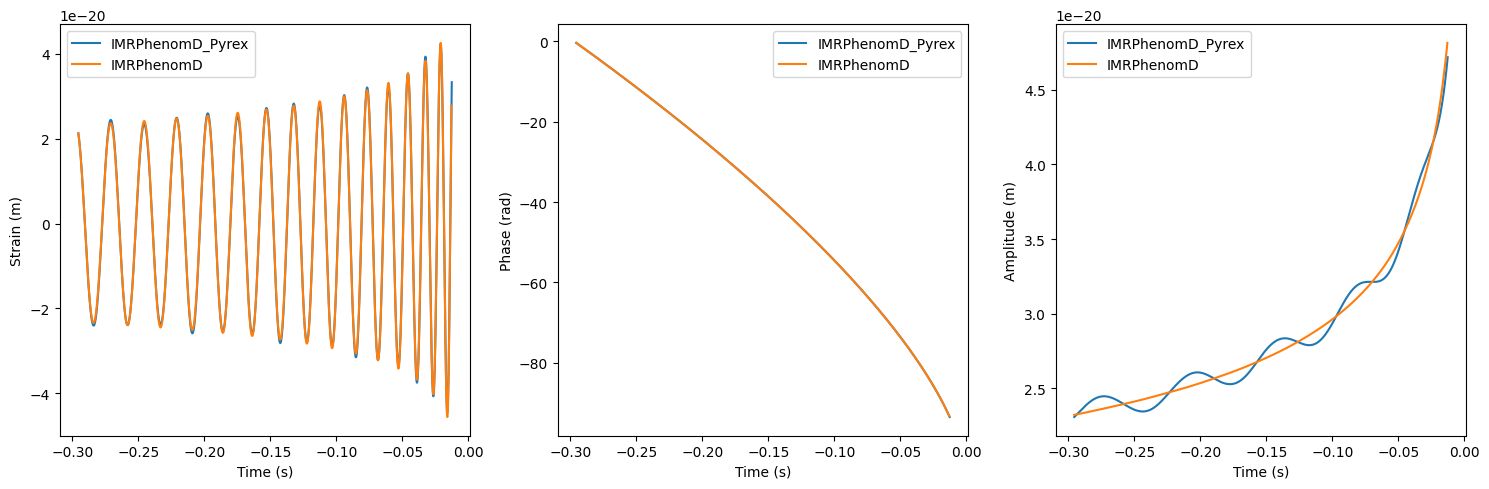

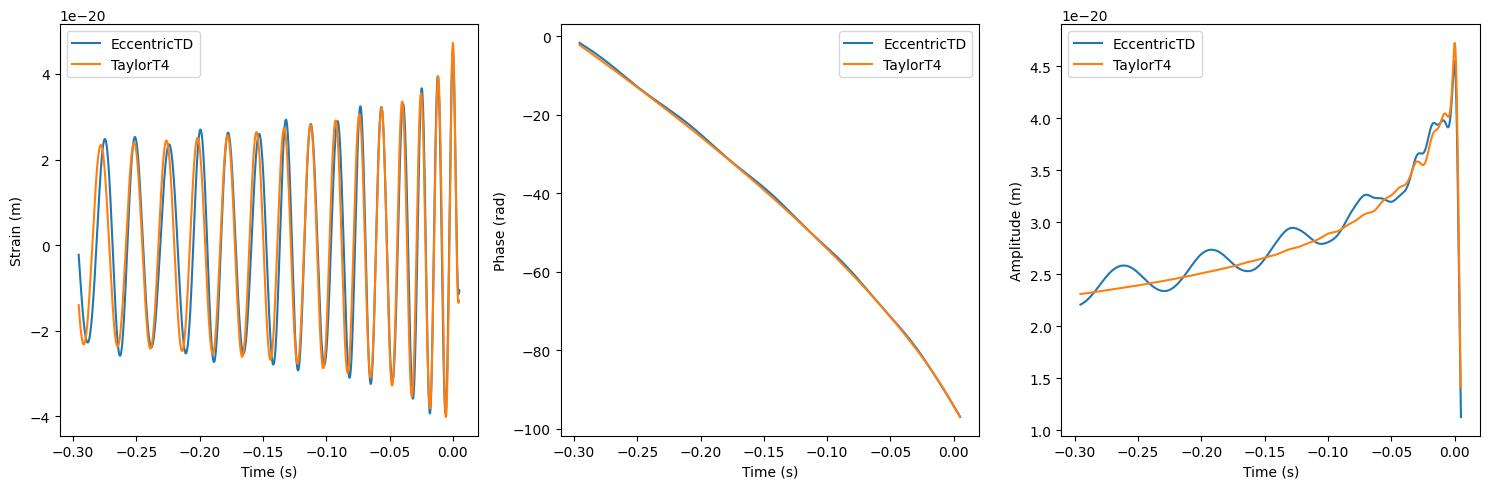

In [11]:
kwargs = {
    "mass1": 20,
    "mass2": 20,
    "inclination": 0,
    "coa_phase": 0,
    "delta_t": 1.0 / 4196,
    "f_lower": 20,
    "f_ref": 25,
    "distance": 10,
}

phen = cut(isco_freq(Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)))
kwargs.update({"amplitude0": 0, "phase0": 4})
taylor_t4 = cut(isco_freq(Waveform.from_model("TaylorT4", [(2, 2)], **kwargs)))
kwargs.update({"eccentricity": 0.1})
phen_ecc = cut(isco_freq(main("IMRPhenomD", [(2, 2)], **kwargs)))
eccentric_td = cut(isco_freq(Waveform.from_model("EccentricTD", [(2, 2)], **kwargs)))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(phen_ecc.time, phen_ecc[2, 2], label="IMRPhenomD_Pyrex")
axes[0].plot(phen.time, phen[2, 2], label="IMRPhenomD")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(phen_ecc.time, phen_ecc.phase(), label="IMRPhenomD_Pyrex")
axes[1].plot(phen.time, phen.phase(), label="IMRPhenomD")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(phen_ecc.time, phen_ecc.amp(), label="IMRPhenomD_Pyrex")
axes[2].plot(phen.time, phen.amp(), label="IMRPhenomD")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(eccentric_td.time, eccentric_td[2, 2], label="EccentricTD")
axes[0].plot(taylor_t4.time, taylor_t4[2, 2], label="TaylorT4")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(eccentric_td.time, eccentric_td.phase(), label="EccentricTD")
axes[1].plot(taylor_t4.time, taylor_t4.phase(), label="TaylorT4")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(eccentric_td.time, eccentric_td.amp(), label="EccentricTD")
axes[2].plot(taylor_t4.time, taylor_t4.amp(), label="TaylorT4")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()


## Eccentricity mismatch

Now with these adjustments in mind we can take a look at the mismatches between circular and eccentric coutnerparts as an estimate of the size of the introduced modulations. The expectation is that at low eccentricity the mismatch is lower, especially at low masses, since these inspirals have more orbits for the eccentricity to radiate away. At large masses and eccentricity the mismatch should be the largest.

### Setting expectations

To test whether these expectations are correct the mismatch between the circular TaylorT4 and the eccentric counterpart EccentricTD are calculated with the beforementioned restrictions, namely cuts from $-1500M$ to $f_\text{ISCO}$. The plot shows that the expectations represent the result fairly well, with some deviations at low eccentricity and high mass, which could be an artifact from the way these models cut at $f_\text{ISCO}$.

In [12]:
q = 1
spin1=(0,0,0)
spin2=(0,0,0)
distance, inclination, coa_phase = 10, 0, 0
f_lower=20

eccentricities = np.linspace(1e-30, 0.2, 50)
total_masses = np.linspace(20, 150, 50)

mismatches = np.zeros((len(eccentricities), len(total_masses)))

for i, e in enumerate(eccentricities):
    for j, M in enumerate(total_masses):
        mass1 = q * M / (q + 1)
        mass2 = M / (q + 1)
        kwargs = {'mass1': mass1, 'mass2': mass2, 'eccentricity': 0,
                  'spin1': spin1, 'spin2': spin2,
                  'inclination': inclination, 'distance': distance,
                  'coa_phase': coa_phase, "delta_t": 1.0 / 4096,
                  "f_ref": 20, "f_lower": f_lower}
        
        kwargs.update({"amplitude0": 0, "phase0": 4})

        taylor_t4 = cut(isco_freq(Waveform.from_model("TaylorT4", [(2, 2)], **kwargs)))
        kwargs.update({"eccentricity": e})
        eccentric_td = cut(isco_freq(Waveform.from_model("EccentricTD", [(2, 2)], **kwargs)))

        mismatches[i, j] = 1 - taylor_t4.match(eccentric_td, f_lower)

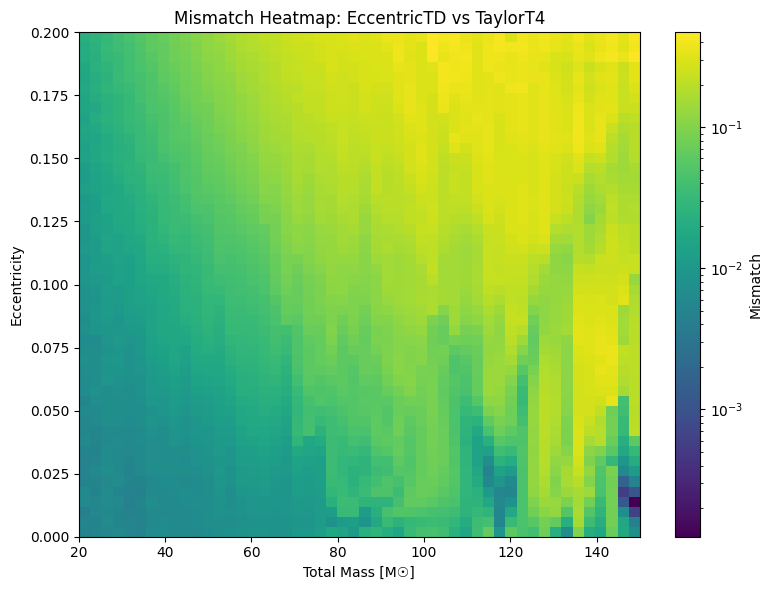

In [13]:
plt.figure(figsize=(8, 6))
plt.imshow(mismatches, origin='lower', aspect='auto',
           extent=[total_masses.min(), total_masses.max(),
                   eccentricities.min(), eccentricities.max()],
           cmap='viridis',
           norm=colors.LogNorm(vmin=np.nanmin(mismatches[mismatches > 0]),  # avoid log(0)
                               vmax=np.nanmax(mismatches)))
plt.colorbar(label="Mismatch")
plt.xlabel("Total Mass [M☉]")
plt.ylabel("Eccentricity")
plt.title("Mismatch Heatmap: EccentricTD vs TaylorT4")
plt.tight_layout()
plt.show()

### Pyrex

The heatmap from Pyrex looks comparable, but has several features which distinguish it from the previous heatmap. The most obvious is the high mismatch spike at $e\approx 0.07$, followed by the very low mismatches at 0 eccentricity and the mismatches being lower before increasing again at constant eccentricity seen right above the $40M_\odot$ mark. If we ignore these features, the same pattern is visible as in the previous plot.

In [29]:
q = 1
spin1=(0,0,0)
spin2=(0,0,0)
distance, inclination, coa_phase = 10, 0, 0
f_lower=20

eccentricities = np.linspace(1e-30, 0.2, 50)
total_masses = np.linspace(20, 150, 50)

mismatches = np.zeros((len(eccentricities), len(total_masses)))

for i, e in enumerate(eccentricities):
    for j, M in enumerate(total_masses):
        mass1 = q * M / (q + 1)
        mass2 = M / (q + 1)
        kwargs = {'mass1': mass1, 'mass2': mass2, 'eccentricity': e,
                  'spin1': spin1, 'spin2': spin2,
                  'inclination': inclination, 'distance': distance,
                  'coa_phase': coa_phase, "delta_t": 1.0 / 4096,
                  "f_ref": 20, "f_lower": f_lower}

        phen_ecc = cut(isco_freq(main("IMRPhenomD", [(2, 2)], **kwargs)))
        kwargs.pop("eccentricity")
        phen_circ = cut(isco_freq(Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)))

        mismatches[i, j] = 1 - phen_ecc.match(phen_circ, f_lower)

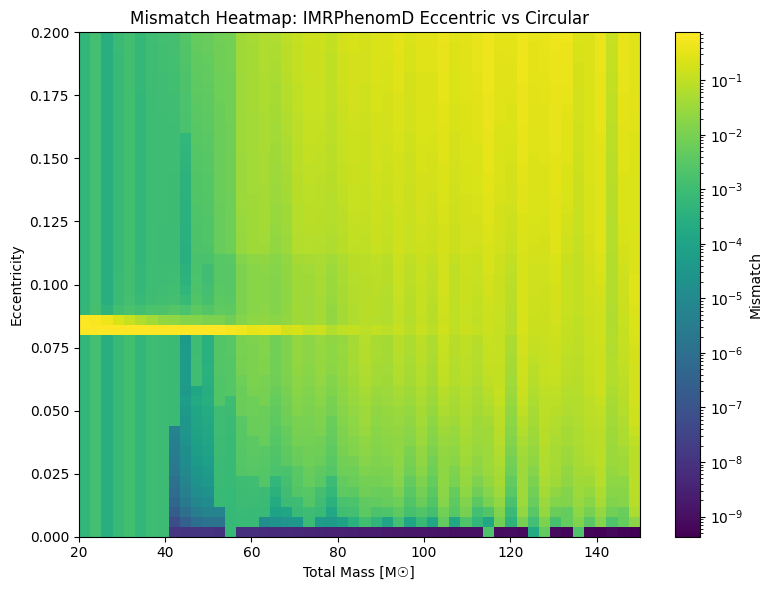

In [30]:
plt.figure(figsize=(8, 6))
plt.imshow(mismatches, origin='lower', aspect='auto',
           extent=[total_masses.min(), total_masses.max(),
                   eccentricities.min(), eccentricities.max()],
           cmap='viridis',
           norm=colors.LogNorm(vmin=np.nanmin(mismatches[mismatches > 0]),  # avoid log(0)
                               vmax=np.nanmax(mismatches)))
plt.colorbar(label="Mismatch")
plt.xlabel("Total Mass [M☉]")
plt.ylabel("Eccentricity")
plt.title("Mismatch Heatmap: IMRPhenomD Eccentric vs Circular")
plt.tight_layout()
plt.show()

### Zoomed in

When zooming in the area turns out to be of a nontrivial shape. The cause of this I do not know.

In [31]:
q = 1
spin1=(0,0,0)
spin2=(0,0,0)
distance, inclination, coa_phase = 10, 0, 0
f_lower=20

eccentricities = np.linspace(0.078, 0.088, 50)
total_masses = np.linspace(20, 170, 50)

mismatches = np.zeros((len(eccentricities), len(total_masses)))

for i, e in enumerate(eccentricities):
    for j, M in enumerate(total_masses):
        mass1 = q * M / (q + 1)
        mass2 = M / (q + 1)
        kwargs = {'mass1': mass1, 'mass2': mass2, 'eccentricity': e,
                  'spin1': spin1, 'spin2': spin2,
                  'inclination': inclination, 'distance': distance,
                  'coa_phase': coa_phase, "delta_t": 1.0 / 4096,
                  "f_ref": 20, "f_lower": f_lower}

        phen_ecc = cut(isco_freq(main("IMRPhenomD", [(2, 2)], **kwargs)))
        kwargs.pop("eccentricity")
        phen_circ = cut(isco_freq(Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)))

        # fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # axes[0].plot(phen_ecc.time, phen_ecc[2, 2], label="IMRPhenomD_Pyrex")
        # axes[0].plot(phen_circ.time, phen_circ[2, 2], label="IMRPhenomD")
        # axes[0].set_ylabel("Strain (m)")
        # axes[0].set_xlabel("Time (s)")
        # axes[0].legend()

        # axes[1].plot(phen_ecc.time, phen_ecc.phase(), label="IMRPhenomD_Pyrex")
        # axes[1].plot(phen_circ.time, phen_circ.phase(), label="IMRPhenomD")
        # axes[1].set_ylabel("Phase (rad)")
        # axes[1].set_xlabel("Time (s)")
        # axes[1].legend()

        # axes[2].plot(phen_ecc.time, phen_ecc.amp(), label="IMRPhenomD_Pyrex")
        # axes[2].plot(phen_circ.time, phen_circ.amp(), label="IMRPhenomD")
        # axes[2].set_ylabel("Amplitude (m)")
        # axes[2].set_xlabel("Time (s)")
        # axes[2].legend()

        # plt.tight_layout()
        # plt.show()
        try:
            mismatches[i, j] = 1 - phen_ecc.match(phen_circ, f_lower)
        except:
            continue


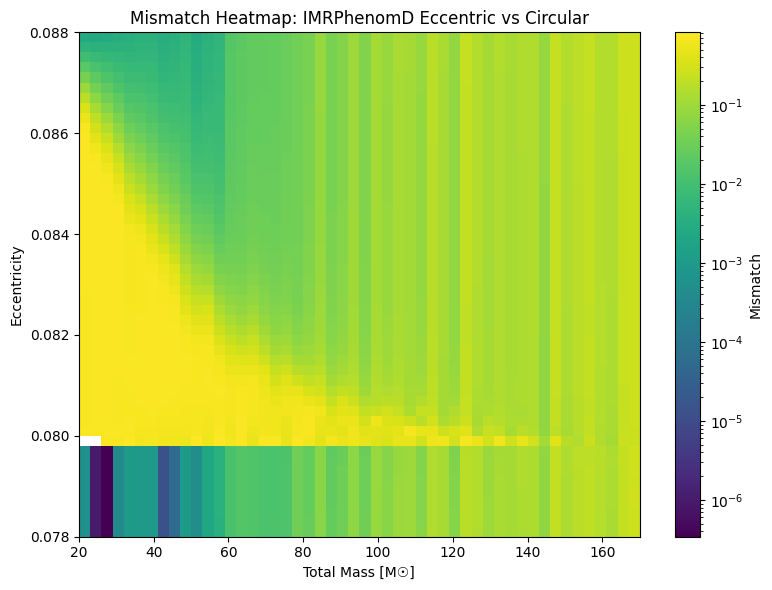

In [32]:
plt.figure(figsize=(8, 6))
plt.imshow(mismatches, origin='lower', aspect='auto',
           extent=[total_masses.min(), total_masses.max(),
                   eccentricities.min(), eccentricities.max()],
           cmap='viridis',
           norm=colors.LogNorm(vmin=np.nanmin(mismatches[mismatches > 0]),  # avoid log(0)
                               vmax=np.nanmax(mismatches)))
plt.colorbar(label="Mismatch")
plt.xlabel("Total Mass [M☉]")
plt.ylabel("Eccentricity")
plt.title("Mismatch Heatmap: IMRPhenomD Eccentric vs Circular")
plt.tight_layout()
plt.show()

## Final inspections

The strange features as seen in the previous heatmap deserve some further inspection.

### $e=0.07$

This seems to be a complete breakdown of the fit. There might be several things that cause this. First and foremost, this part of the parameter space is **not** covered by any of the simulations used to fit the parameters. This could lead to the interpolation using two clashing data points at $e=0.053$ and $e=0.097$ to interpolate the $e\approx 0.07$ data points. Still, it would be unexpected for this to happen only between these two datapoints, which might point that the literature values for the fits are incorrect. The strain, accumulated phase, and amplitude are shown below. 

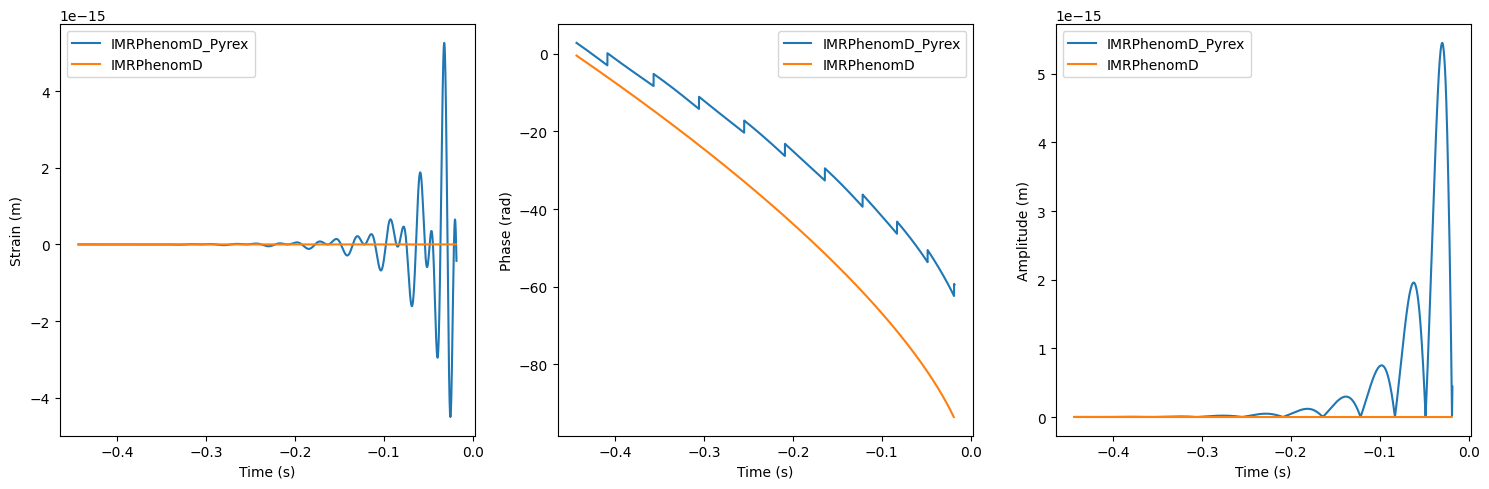

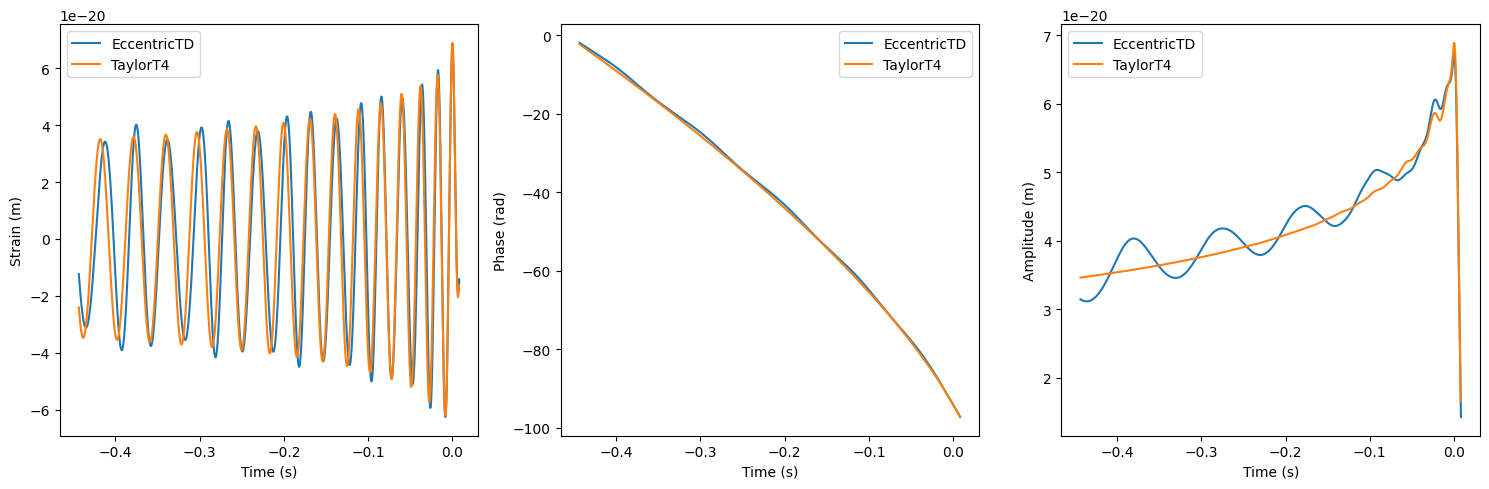

In [33]:
kwargs = {
    "mass1": 30,
    "mass2": 30,
    "inclination": 0,
    "coa_phase": 0,
    "delta_t": 1.0 / 16096,
    "f_lower": 20,
    "f_ref": 25,
    "distance": 10,
}

phen = cut(isco_freq(Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)))
kwargs.update({"amplitude0": 0, "phase0": 4})
taylor_t4 = cut(isco_freq(Waveform.from_model("TaylorT4", [(2, 2)], **kwargs)))
kwargs.update({"eccentricity": 0.080253})
phen_ecc = cut(isco_freq(main("IMRPhenomD", [(2, 2)], **kwargs)))
eccentric_td = cut(isco_freq(Waveform.from_model("EccentricTD", [(2, 2)], **kwargs)))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(phen_ecc.time, phen_ecc[2, 2], label="IMRPhenomD_Pyrex")
axes[0].plot(phen.time, phen[2, 2], label="IMRPhenomD")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(phen_ecc.time, phen_ecc.phase(), label="IMRPhenomD_Pyrex")
axes[1].plot(phen.time, phen.phase(), label="IMRPhenomD")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(phen_ecc.time, phen_ecc.amp(), label="IMRPhenomD_Pyrex")
axes[2].plot(phen.time, phen.amp(), label="IMRPhenomD")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(eccentric_td.time, eccentric_td[2, 2], label="EccentricTD")
axes[0].plot(taylor_t4.time, taylor_t4[2, 2], label="TaylorT4")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(eccentric_td.time, eccentric_td.phase(), label="EccentricTD")
axes[1].plot(taylor_t4.time, taylor_t4.phase(), label="TaylorT4")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(eccentric_td.time, eccentric_td.amp(), label="EccentricTD")
axes[2].plot(taylor_t4.time, taylor_t4.amp(), label="TaylorT4")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()


### $e=0$

For the $e=0$ case it is unclear what is going on. The visual inspections shown below do not offer any further insight, except that at the low eccentricity case, the mismatch approaches zero. This, however, does not explain the large jump that happens, which might be an artifact of the interpolation method. The used function for $e_X$ also offers no obvious insight as to any asymptotics. The zero eccentricity heatmap is not directly comparable since that does not cut the waveforms anywhere.

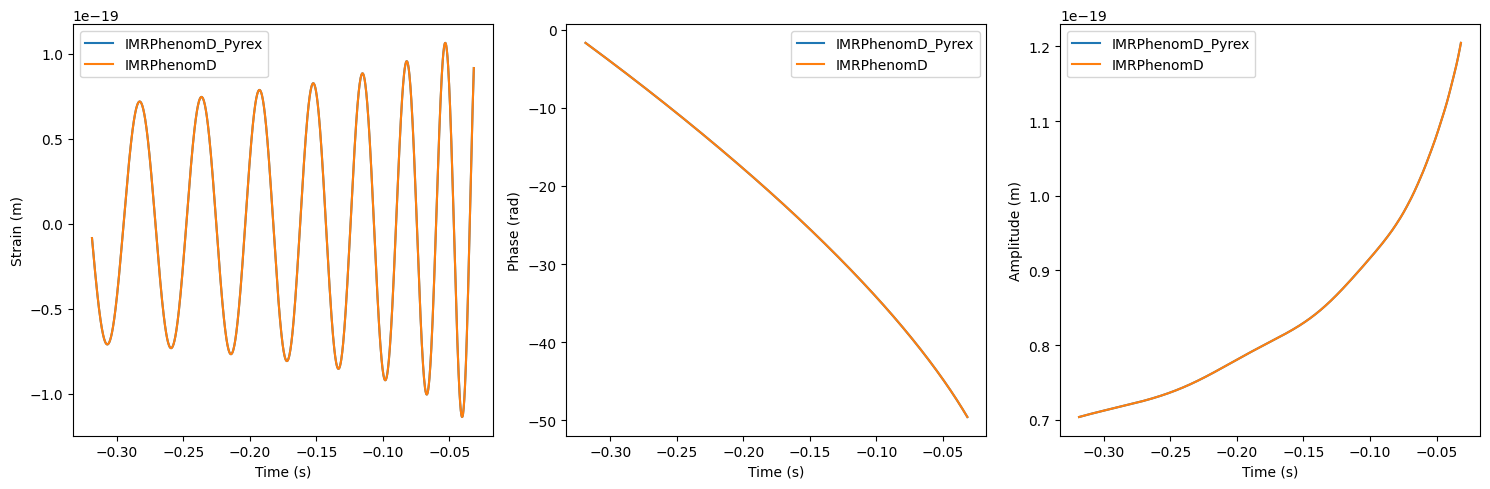

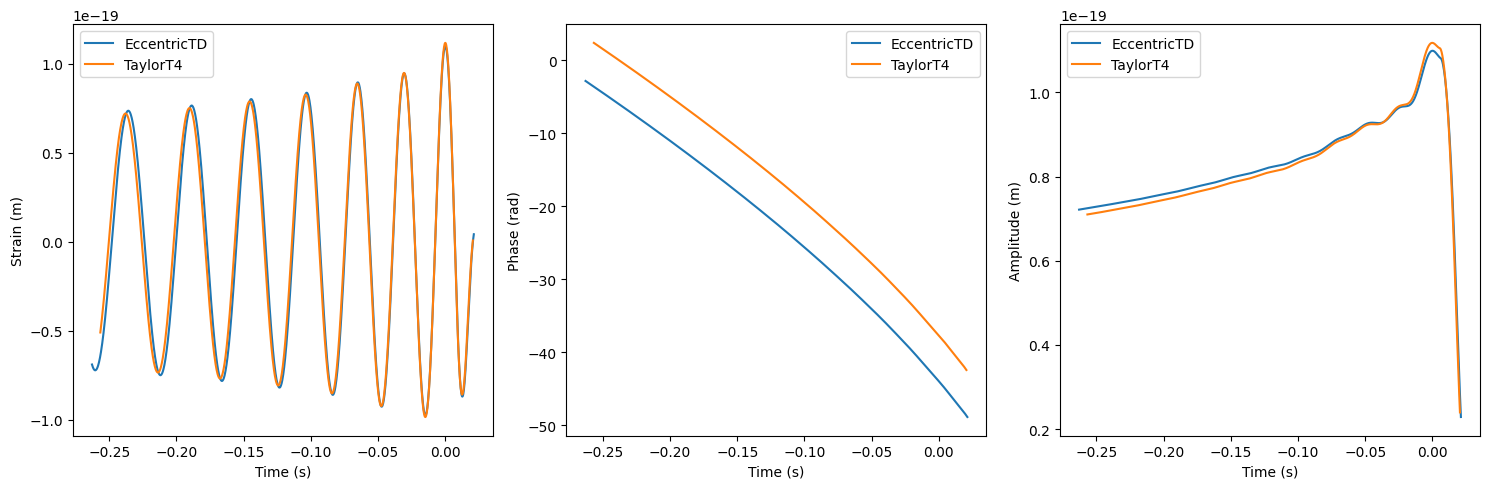

In [19]:
kwargs = {
    "mass1": 50,
    "mass2": 50,
    "inclination": 0,
    "coa_phase": 0,
    "delta_t": 1.0 / 4196,
    "f_lower": 20,
    "f_ref": 25,
    "distance": 10,
}

phen = cut(isco_freq(Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)))
kwargs.update({"amplitude0": 0, "phase0": 4})
taylor_t4 = cut(isco_freq(Waveform.from_model("TaylorT4", [(2, 2)], **kwargs)))
kwargs.update({"eccentricity": 1e-30})
phen_ecc = cut(isco_freq(main("IMRPhenomD", [(2, 2)], **kwargs)))
eccentric_td = cut(isco_freq(Waveform.from_model("EccentricTD", [(2, 2)], **kwargs)))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(phen_ecc.time, phen_ecc[2, 2], label="IMRPhenomD_Pyrex")
axes[0].plot(phen.time, phen[2, 2], label="IMRPhenomD")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(phen_ecc.time, phen_ecc.phase(), label="IMRPhenomD_Pyrex")
axes[1].plot(phen.time, phen.phase(), label="IMRPhenomD")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(phen_ecc.time, phen_ecc.amp(), label="IMRPhenomD_Pyrex")
axes[2].plot(phen.time, phen.amp(), label="IMRPhenomD")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(eccentric_td.time, eccentric_td[2, 2], label="EccentricTD")
axes[0].plot(taylor_t4.time, taylor_t4[2, 2], label="TaylorT4")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(eccentric_td.time, eccentric_td.phase(), label="EccentricTD")
axes[1].plot(taylor_t4.time, taylor_t4.phase(), label="TaylorT4")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(eccentric_td.time, eccentric_td.amp(), label="EccentricTD")
axes[2].plot(taylor_t4.time, taylor_t4.amp(), label="TaylorT4")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()

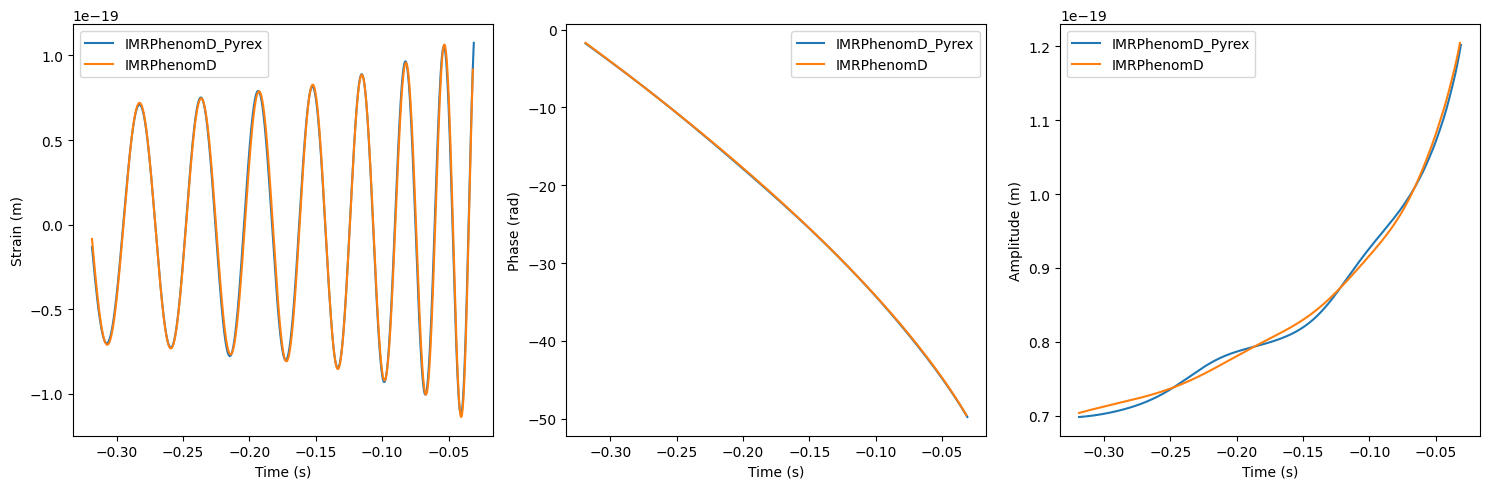

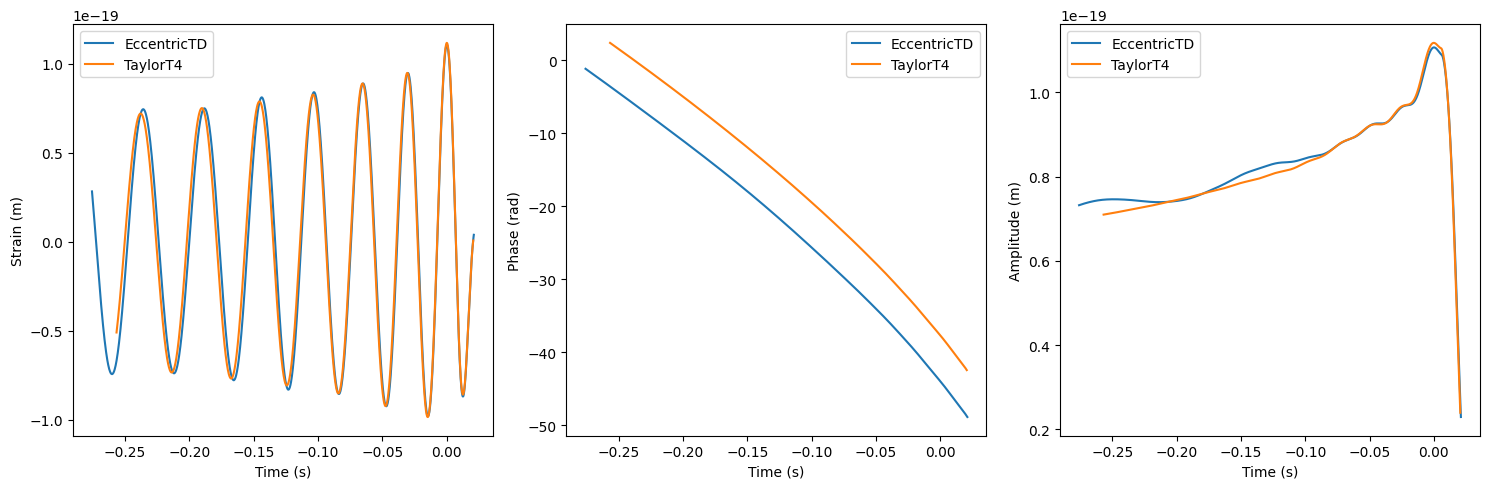

In [20]:
kwargs = {
    "mass1": 50,
    "mass2": 50,
    "inclination": 0,
    "coa_phase": 0,
    "delta_t": 1.0 / 4196,
    "f_lower": 20,
    "f_ref": 25,
    "distance": 10,
}

phen = cut(isco_freq(Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)))
kwargs.update({"amplitude0": 0, "phase0": 4})
taylor_t4 = cut(isco_freq(Waveform.from_model("TaylorT4", [(2, 2)], **kwargs)))
kwargs.update({"eccentricity": 0.01})
phen_ecc = cut(isco_freq(main("IMRPhenomD", [(2, 2)], **kwargs)))
eccentric_td = cut(isco_freq(Waveform.from_model("EccentricTD", [(2, 2)], **kwargs)))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(phen_ecc.time, phen_ecc[2, 2], label="IMRPhenomD_Pyrex")
axes[0].plot(phen.time, phen[2, 2], label="IMRPhenomD")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(phen_ecc.time, phen_ecc.phase(), label="IMRPhenomD_Pyrex")
axes[1].plot(phen.time, phen.phase(), label="IMRPhenomD")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(phen_ecc.time, phen_ecc.amp(), label="IMRPhenomD_Pyrex")
axes[2].plot(phen.time, phen.amp(), label="IMRPhenomD")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(eccentric_td.time, eccentric_td[2, 2], label="EccentricTD")
axes[0].plot(taylor_t4.time, taylor_t4[2, 2], label="TaylorT4")
axes[0].set_ylabel("Strain (m)")
axes[0].set_xlabel("Time (s)")
axes[0].legend()

axes[1].plot(eccentric_td.time, eccentric_td.phase(), label="EccentricTD")
axes[1].plot(taylor_t4.time, taylor_t4.phase(), label="TaylorT4")
axes[1].set_ylabel("Phase (rad)")
axes[1].set_xlabel("Time (s)")
axes[1].legend()

axes[2].plot(eccentric_td.time, eccentric_td.amp(), label="EccentricTD")
axes[2].plot(taylor_t4.time, taylor_t4.amp(), label="TaylorT4")
axes[2].set_ylabel("Amplitude (m)")
axes[2].set_xlabel("Time (s)")
axes[2].legend()

plt.tight_layout()
plt.show()


## Trying a fix

To see whether the proposed idea is indeed the cause of the issues, I tried removing one of the simulations around the $e\approx 0.09$ mark. As seen below, when removing *SXS:BBH:1355*, the size of the error in parameter space is significantly smaller. This suggests that the interpolation between well-mapped points in parameter space causes these discrepancies, which is something to be careful of when increasing the number of used simulations.

In [46]:
sims = ["SXS:BBH:0180v2.0", "SXS:BBH:1357", "SXS:BBH:1362", "SXS:BBH:1363v2.0", "SXS:BBH:0184v2.0", "SXS:BBH:1364", "SXS:BBH:1368", "SXS:BBH:1369", "SXS:BBH:0183v2.0", "SXS:BBH:1373", "SXS:BBH:1374"]
q = [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0]

training = glassware(q=q, names=sims, outfname="/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/data/pyrexdata.pkl")

In [47]:
q = 1
spin1=(0,0,0)
spin2=(0,0,0)
distance, inclination, coa_phase = 10, 0, 0
f_lower=20

eccentricities = np.linspace(1e-30, 0.2, 50)
total_masses = np.linspace(20, 150, 50)

mismatches = np.zeros((len(eccentricities), len(total_masses)))

for i, e in enumerate(eccentricities):
    for j, M in enumerate(total_masses):
        mass1 = q * M / (q + 1)
        mass2 = M / (q + 1)
        kwargs = {'mass1': mass1, 'mass2': mass2, 'eccentricity': e,
                  'spin1': spin1, 'spin2': spin2,
                  'inclination': inclination, 'distance': distance,
                  'coa_phase': coa_phase, "delta_t": 1.0 / 4096,
                  "f_ref": 20, "f_lower": f_lower}

        phen_ecc = cut(isco_freq(main("IMRPhenomD", [(2, 2)], **kwargs)))
        kwargs.pop("eccentricity")
        phen_circ = cut(isco_freq(Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)))

        mismatches[i, j] = 1 - phen_ecc.match(phen_circ, f_lower)

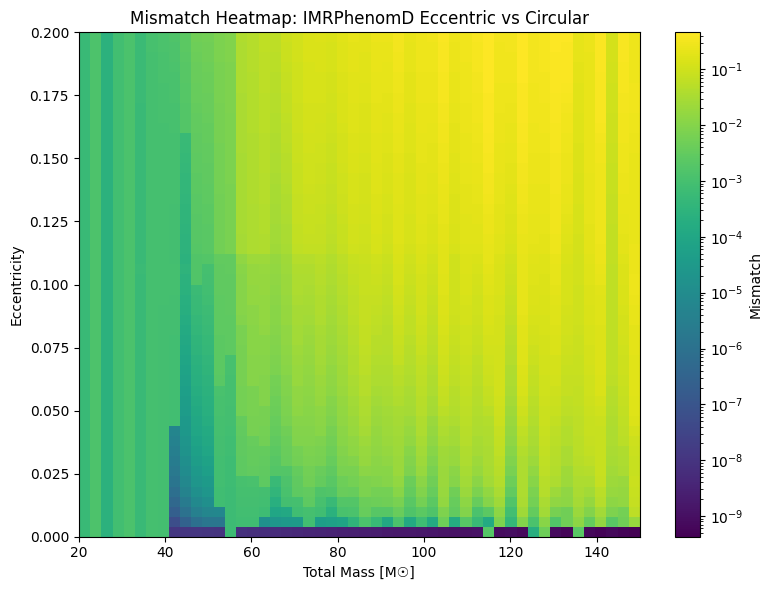

In [48]:
plt.figure(figsize=(8, 6))
plt.imshow(mismatches, origin='lower', aspect='auto',
           extent=[total_masses.min(), total_masses.max(),
                   eccentricities.min(), eccentricities.max()],
           cmap='viridis',
           norm=colors.LogNorm(vmin=np.nanmin(mismatches[mismatches > 0]),  # avoid log(0)
                               vmax=np.nanmax(mismatches)))
plt.colorbar(label="Mismatch")
plt.xlabel("Total Mass [M☉]")
plt.ylabel("Eccentricity")
plt.title("Mismatch Heatmap: IMRPhenomD Eccentric vs Circular")
plt.tight_layout()
plt.show()

In [49]:
q = 1
spin1=(0,0,0)
spin2=(0,0,0)
distance, inclination, coa_phase = 10, 0, 0
f_lower=20

eccentricities = np.linspace(0.078, 0.088, 50)
total_masses = np.linspace(20, 170, 50)

mismatches = np.zeros((len(eccentricities), len(total_masses)))

for i, e in enumerate(eccentricities):
    for j, M in enumerate(total_masses):
        mass1 = q * M / (q + 1)
        mass2 = M / (q + 1)
        kwargs = {'mass1': mass1, 'mass2': mass2, 'eccentricity': e,
                  'spin1': spin1, 'spin2': spin2,
                  'inclination': inclination, 'distance': distance,
                  'coa_phase': coa_phase, "delta_t": 1.0 / 4096,
                  "f_ref": 20, "f_lower": f_lower}

        phen_ecc = cut(isco_freq(main("IMRPhenomD", [(2, 2)], **kwargs)))
        kwargs.pop("eccentricity")
        phen_circ = cut(isco_freq(Waveform.from_model("IMRPhenomD", [(2, 2)], **kwargs)))

        try:
            mismatches[i, j] = 1 - phen_ecc.match(phen_circ, f_lower)
        except:
            continue


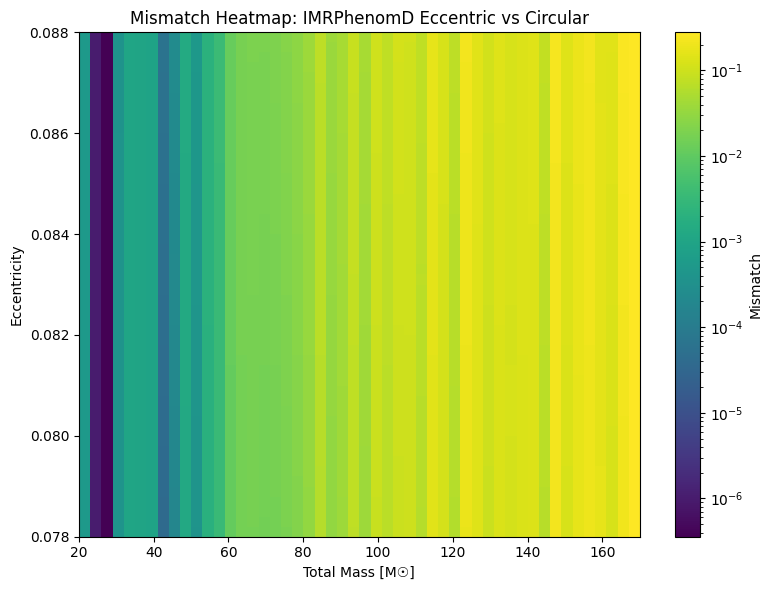

In [50]:
plt.figure(figsize=(8, 6))
plt.imshow(mismatches, origin='lower', aspect='auto',
           extent=[total_masses.min(), total_masses.max(),
                   eccentricities.min(), eccentricities.max()],
           cmap='viridis',
           norm=colors.LogNorm(vmin=np.nanmin(mismatches[mismatches > 0]),  # avoid log(0)
                               vmax=np.nanmax(mismatches)))
plt.colorbar(label="Mismatch")
plt.xlabel("Total Mass [M☉]")
plt.ylabel("Eccentricity")
plt.title("Mismatch Heatmap: IMRPhenomD Eccentric vs Circular")
plt.tight_layout()
plt.show()

## Conclusions

Despite some differences between the original and current implementation of the Pyrex code (namely the number of splines and dealing with nans and infs) it is clear that the idea works in principle, but is unsuitable for any PE. Besides the nature of shown numerical errors in certain parts of the parameter space, likely due to errors in the priors, the generated waveforms are too short to be of any use. Therefore, other methods should be explored that offer a more flexible solution.